# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 COVID-19 Cases Data](#3.4.1_COVID-19_Cases_Data)
    * [3.4.2 COVID-19 Cases Normalized](#3.4.2_COVID-19_Cases_Normalized)
      * [3.4.2.1 Africa Statistics](#3.4.2.1_Africa_Statistics)
      * [3.4.2.2 Asia Cases Normalized](#3.4.2.2_Asia_Cases_Normalized)
      * [3.4.2.3 Europe Cases Normalized](#3.4.2.3_Europe_Cases_Normalized)
      * [3.4.2.4 North America Cases Normalized](#3.4.2.4_North_America_Cases_Normalized)
      * [3.4.2.5 South America Cases Normalized](#3.4.2.5_South_America_Cases_Normalized)
    * [3.4.3 Vaccine Data Sources](#3.4.3_Vaccine_Data_Sources)
    * [3.4.4 Vaccine Ratios](#3.4.4_Vaccine_Ratios)
    * [3.4.5 World Data](#3.4.5_World_Data)
  * [3.5 Summary](#3.5_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point I have a firm idea of what my data science problem is and I believe I could help solve it. There were two different data sets that were cleaned: the vaccine dataset and the COVID-19 cases dataset. Most of the exploratory analysis was done in the data wrangling for the vaccine dataset. Predicting the distribution of the vaccine globally is highly dependent on the capacity for manufacturers to make the drug and the regulating authorities to distribute it accordingly.    

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#This library was created by the author of DataScienceGuidedCapstone found in my GitHub repository
#It has been used in this notebook for the sole purpose of saving files
from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 COVID-19 Cases Data<a id='3.4.1_COVID-19_Cases_Data'></a>

In [2]:
cases = pd.read_csv('../data/covid_cases_cleaned.csv')
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967749 entries, 0 to 967748
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     967749 non-null  object 
 1   country                  967749 non-null  object 
 2   confirmed                967749 non-null  int64  
 3   deaths                   967749 non-null  float64
 4   recovered                967749 non-null  float64
 5   active                   967749 non-null  float64
 6   log_converted_confirmed  967749 non-null  float64
 7   log_converted_deaths     967749 non-null  float64
 8   log_converted_recovered  967749 non-null  float64
 9   log_converted_active     967749 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 73.8+ MB


In [3]:
cases.set_index('date')

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-01-26,Canada,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-01-27,Canada,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-01-28,Canada,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-01-28,Canada,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-01-29,Canada,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
...,...,...,...,...,...,...,...,...,...
2020-12-31,United States,2138,4.0,0.0,2134.0,0.862584,-0.021338,-0.287585,-0.018623
2020-12-31,United States,1558,7.0,0.0,1551.0,0.741616,0.250390,-0.287585,-0.035593
2020-12-31,United States,0,0.0,0.0,0.0,-2.071855,-1.216878,-0.287585,-0.078786


### 3.4.2 COVID-19 Cases Normalized<a id='3.4.2_COVID-19_Cases_Normalized'></a>

In [4]:
cases.country.value_counts(normalize=True)

United States           0.917051
Russia                  0.018223
China                   0.010953
India                   0.007810
Mexico                  0.007511
Brazil                  0.006328
Italy                   0.005077
Spain                   0.004834
Canada                  0.004435
Germany                 0.004133
United Kingdom          0.004106
Chile                   0.003998
France                  0.003329
United Arab Emirates    0.000346
Israel                  0.000322
Indonesia               0.000312
Morocco                 0.000312
Poland                  0.000310
Bangladesh              0.000306
Turkey                  0.000303
Name: country, dtype: float64

US makes up 91% of the data

#### 3.4.2.1 Africa Statistics<a id='3.4.2.1_Africa_Statistics'></a>

In [5]:
#Africa: Morrocco
mor_df = pd.DataFrame(cases[cases['country'] == 'Morocco'])
mor_df.describe()

,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,104167.655629,1769.357616,88067.208609,14331.089404,1.686095,1.529431,3.315966,0.366004
std,137022.051607,2261.909532,120982.027899,15373.577791,1.063760,0.715692,0.731253,0.487736
min,1.000000,0.000000,0.000000,1.000000,-1.806450,-1.216878,-0.287585,-0.078764
25%,6773.250000,192.000000,3530.250000,2144.250000,1.303406,1.474349,3.493149,-0.018322
50%,23790.500000,349.500000,17484.500000,5956.500000,1.783609,1.617980,3.493158,0.095935
75%,169970.250000,2863.000000,140783.000000,24813.000000,2.535269,1.989406,3.493158,0.690215
max,439193.000000,7388.000000,407504.000000,49800.000000,2.898057,2.105452,3.493158,1.506700


In [6]:
mor_df.to_csv("../data/mor_df.csv")

#### 3.4.2.1 Asia Cases Normalized<a id='3.4.2.2_Asia_Cases_Normalized'></a>

In [7]:
#Asia: Indonesia, Bangladesh, United Arab Emirates, Israel, Turkey, India, China, Russia
ind_df = cases[cases['country'] == 'Indonesia']
bgd_df = cases[cases['country'] == 'Bangladesh']
are_df = cases[cases['country'] == 'United Arab Emirates']
isr_df = cases[cases['country'] == 'Israel']
tur_df = cases[cases['country'] == 'Turkey']
indi_df = cases[cases['country'] == 'India']
chn_df = cases[cases['country'] == 'China']
rus_df = cases[cases['country'] == 'Russia']

asia_df = pd.concat([ind_df, bgd_df, are_df, isr_df, tur_df, indi_df, chn_df, rus_df]).set_index('date')

asia_df.country.value_counts(normalize=True)

Russia                  0.472396
China                   0.283946
India                   0.202459
United Arab Emirates    0.008974
Israel                  0.008358
Indonesia               0.008090
Bangladesh              0.007929
Turkey                  0.007849
Name: country, dtype: float64

In [8]:
asia_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-06,Indonesia,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695


In [9]:
asia_df.to_csv("../data/asia_df.csv")

#### 3.4.2.3 Europe Cases Normalized<a id='3.4.2.3_Europe_Cases_Normalized'></a>

In [10]:
#Europe: Poland, Spain, Italy, Germany, France, Russia, United Kingdom
pol_df = cases[cases['country'] == 'Poland']
esp_df = cases[cases['country'] == 'Spain']
ity_df = cases[cases['country'] == 'Italy']
deu_df = cases[cases['country'] == 'Germany']
fra_df = cases[cases['country'] == 'France']
gbr_df = cases[cases['country'] == 'United Kingdom']

eu_df = pd.concat([pol_df, esp_df, ity_df, deu_df, fra_df, gbr_df]).set_index('date')
eu_df.country.value_counts(normalize=True)

Italy             0.232987
Spain             0.221843
Germany           0.189690
United Kingdom    0.188457
France            0.152796
Poland            0.014227
Name: country, dtype: float64

In [11]:
eu_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-04,Poland,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-04,Poland,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-06,Poland,5,0.0,0.0,5.0,-1.385854,-1.216878,-0.287585,-0.078672
2020-03-06,Poland,5,0.0,0.0,5.0,-1.385854,-1.216878,-0.287585,-0.078672
2020-03-08,Poland,11,0.0,0.0,11.0,-1.120526,-1.216878,-0.287585,-0.078530


In [12]:
eu_df.to_csv("../data/eu_df.csv")

#### 3.4.2.4 North America Cases Normalized<a id='3.4.2.4_North_America_Cases_Normalized'></a>

In [13]:
#North America: United States, Canada, Mexico
usa_df = cases[cases['country'] == 'United States']
can_df = cases[cases['country'] == 'Canada']
mex_df = cases[cases['country'] == 'Mexico']

noam_df = pd.concat([usa_df, can_df, mex_df]).set_index('date')
noam_df.country.value_counts(normalize=True)

United States    0.987141
Mexico           0.008085
Canada           0.004774
Name: country, dtype: float64

In [14]:
noam_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-01-22,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-23,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-24,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-24,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-25,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764


In [15]:
noam_df.to_csv("../data/noam_df.csv")

#### 3.4.2.5 South America Cases Normalized<a id='3.4.2.5_South_America_Cases_Normalized'></a>

In [16]:
#South America: Chile, Brazil
chl_df = cases[cases['country'] == 'Chile']
bra_df = cases[cases['country'] == 'Brazil']

soam_df = pd.concat([chl_df, bra_df]).set_index('date')
soam_df.country.value_counts(normalize=True)

Brazil    0.612829
Chile     0.387171
Name: country, dtype: float64

In [17]:
soam_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-03,Chile,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-04,Chile,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695


In [18]:
soam_df.to_csv("../data/soam_df.csv")

### 3.4.3 Vaccine Data Sources<a id='3.4.3_Vaccine_Data_Sources'></a>

In [19]:
vaccines = pd.read_csv('../data/vaccine_data_cleaned.csv')
vaccines.source_name.value_counts(normalize=True)

Ministry of Health                                             0.209282
Government of the United Kingdom                               0.067426
Official data from local governments via gogov.ru              0.066550
Government of Israel                                           0.063047
Centers for Disease Control and Prevention                     0.062172
Secretary of Health                                            0.058669
Department of Statistics and Health Information                0.057793
Robert Koch Institut                                           0.056042
Extraordinary commissioner for the Covid-19 emergency          0.056042
Public Health France                                           0.055166
National Health Commission                                     0.049037
National Emergency Crisis and Disaster Management Authority    0.048161
Government of Canada                                           0.042032
COVID-19 Vaccine Information Platform                          0

### 3.4.4 Vaccine Ratios<a id='3.4.4_Vaccine_Ratios'></a>

In [20]:
maxs = vaccines.groupby('iso_code')['vaccine_ratio'].max()
vc_rat = maxs.sort_values(ascending=False)
vc_rat

iso_code
ISR    0.928158
ARE    0.524126
GBR    0.295380
USA    0.213246
CHL    0.173421
TUR    0.105301
POL    0.084966
MAR    0.084776
ESP    0.076985
DEU    0.071509
ITA    0.067662
FRA    0.065252
CAN    0.040071
BRA    0.037708
RUS    0.034324
CHN    0.024263
MEX    0.017109
BGD    0.016788
IND    0.009770
IDN    0.008673
Name: vaccine_ratio, dtype: float64

<AxesSubplot:xlabel='date', ylabel='vaccine_ratio'>

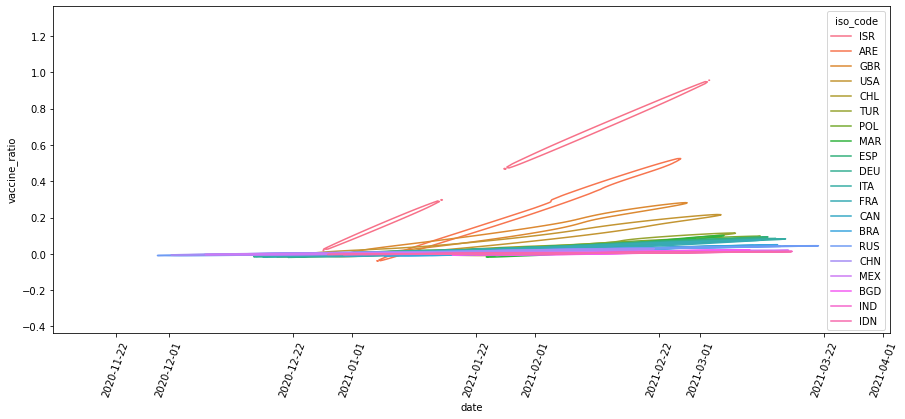

In [21]:
vaccines['date'] = pd.to_datetime(vaccines['date'])
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.xticks(rotation=70)

sns.kdeplot(data=vaccines, x='date', y='vaccine_ratio', hue='iso_code', hue_order=vc_rat.index)

### 3.4.5 World Data<a id='3.4.5_World_Data'></a>

In [22]:
ws = pd.read_csv('../data/world_subset.csv')
ws

,country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Brazil,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
5,Bangladesh,164689383,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
6,Russia,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
7,Mexico,128932753,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %
8,Turkey,84339067,1.09 %,909452,110,769630,283922.0,2.1,32,76 %,1.08 %
9,Germany,83783942,0.32 %,266897,240,348560,543822.0,1.6,46,76 %,1.07 %


In [23]:
# Africa Population 2020
f_pop = 1340598147
#Africa Subset: Morroco
f = ws.iloc[16,1]

print('Africa Sample Population:', (f/f_pop)*100)

Africa Sample Population: 2.753290393739445


In [24]:
# Asia Population 2020
a_pop = 4641054775
# Asia Subset: *-Indonesia, *Bangladesh, *-United Arab Emirates, *-Israel, *-Turkey, *-India, *-China, *-Russia
a = ws.iloc[[0,1,3,5,6,8,18,19],1].sum()

print('Asia Sample Population:', (a/a_pop)*100)

Asia Sample Population: 75.55094251176986


In [25]:
# Europe Population 2020
e_pop = 747636026

# Europe Subset: *-Poland, *-Spain, *-Italy, *-France, *-United Kingdom, *-Germany
e = ws.iloc[9:15,1].sum()

print('Europe Sample Population', (e/e_pop)*100)

Europe Sample Population 48.42017591592088


In [26]:
# North America Population 2020
n_pop = 592072212

#North America Subset: *United States, *Canada, *Mexico
n = ws.iloc[[2,15,7],1].sum()

print('North America Sample Population', (n/n_pop)*100)

North America Sample Population 84.0569018294005


In [27]:
#South America Population 2020
s_pop = 430759766

#South America: *Chile, *Brazil
s = ws.iloc[[4,17],1]

print('South America Sample Population', (s/s_pop)*100)

South America Sample Population 4     49.345235
17     4.437787
Name: Population (2020), dtype: float64


## 3.6 Summary<a id='3.6_Summary'></a>

The 20 countries that were selected for this data exploration had the highest distribution of vaccines for SARS-CoV-2. This information was gathered over a duration of 4 months at the end of 2020 and beginning of 2021, just after vaccines had been approved for clinical trial use. The top five countries with the highest single vaccine ratio per capita were: Israel, United Arab Emirates, United Kingdom, United States, and Chile. The same countries were grouped for the COVID-19 data and then later grouped into their respective continents. Asia has the biggest world population share at about 60% the countries: Indonesia, Bangladesh, United Arab Emirates, Israel, Turkey, India, China, Russia depict roughly 76% of this majority. This dataset is biased and most of the data is represented by the USA, which only has a world share of ~4%. Due to the large bias and in the interest of conveying the true numbers collected the values will not be bootstrapped in effort to make better predictions, the proceeding notebooks will include statistical inference using time analysis. The information in this notebook was prepared during mid 2021 and there is not a cure for COVID-19, going forward the preprocessing/training, and modeling notebooks will be an analysis of the recovered(the number of recovered cases) and active(confirmed - (Deaths + Recovered). As a side note there have been new variants of the SARS-CoV-2 virus, the delta variant (higher viral load) and the lambda variant, that information will not be included in this study.  